In [1]:
from scripts.analysis import WsdAnalysis
from scripts import configuration
from scripts import comparison 
%matplotlib inline
#autoreload magic
%load_ext autoreload
%autoreload 2

## Possible competitions
We focus on competitions annotated with WordNet.
* **se** refers to Senseval (https://en.wikipedia.org/wiki/SemEval)
* **sem** refers to SemEval (https://en.wikipedia.org/wiki/SemEval)
* **pwgc** refers to the "Princeton WordNet Gloss Corpus"
* **ls** lexical sample
* **aw** all-words

In [2]:
competitions = configuration.competitions.keys()
configuration.show_possibilities()

se3-aw     | http://aclweb.org/anthology/W04-0811
wordnet30  | http://aclweb.org/anthology/H94-1111
reuters    | http://aclweb.org/anthology/H05-1053
pwgc       | http://wordnetcode.princeton.edu/glosstag-files/Readme.txt
se2-ls     | http://aclweb.org/anthology/S01-1004
se3-ls     | http://aclweb.org/anthology/W04-0807
sem2013-aw | http://aclweb.org/anthology/S13-2040
semcor30   | http://aclweb.org/anthology/H93-1061
sem2007-aw | http://aclweb.org/anthology/S07-1016
sem2015-aw | http://aclweb.org/anthology/S15-2049
se2-aw     | http://aclweb.org/anthology/S01-1005
semcor16   | http://aclweb.org/anthology/H93-1061


## Choose your competition

In [3]:
# exclude_mfs: if set to True, all mfs instance are ignored
my_wsd_analyzer = WsdAnalysis('sem2013-aw', exclude_mfs=False)

In [4]:
my_wsd_analyzer.metadata()

competition             | sem2013-aw
wordnet_version         | 30
answers_downloaded_from | https://www.cs.york.ac.uk/semeval-2013/task12.html
paper                   | http://aclweb.org/anthology/S13-2040
bibtex                  | http://aclanthology.info/papers/semeval-2013-task-12-multilingual-word-sense-disambiguation.bib
date_of_downloading     | 18-3-2016


In [5]:
# avg_polysemy: pos specific polysemy
# avg_polysemy_pos: non pos specific polysemy
my_wsd_analyzer.basic_stats()

,categories,values
0,competition,sem2013-aw
1,num_of_different_lemmas,751
2,avg_polysemy,4.86
3,avg_num_instances_per_lemma,2.19
4,MFS_baseline,62.96
5,num_of_instances,1644
6,avg_polysemy_all,6.93


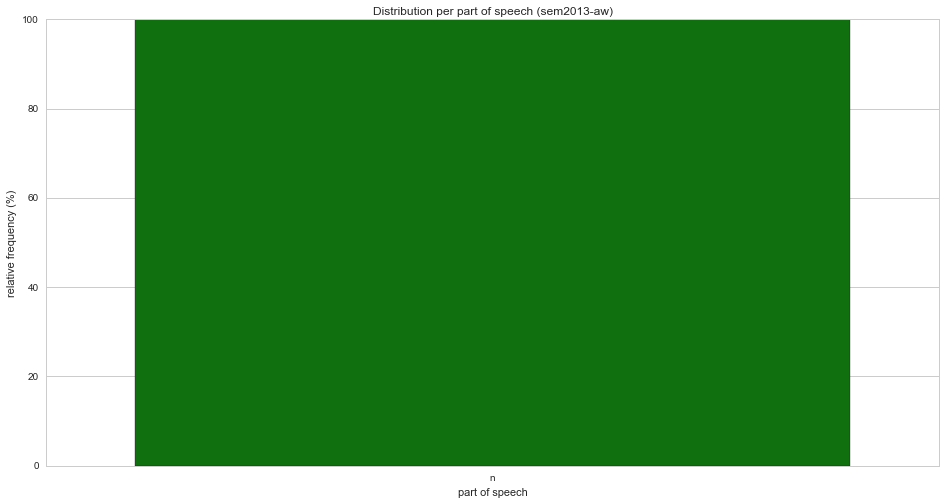

In [6]:
#if rel_freq is set to False, the absolute frequencies are plotted
my_wsd_analyzer.plot('pos', rel_freq=True)


r-squared:" 0.780803887303
p-value: 2.05799442693e-12


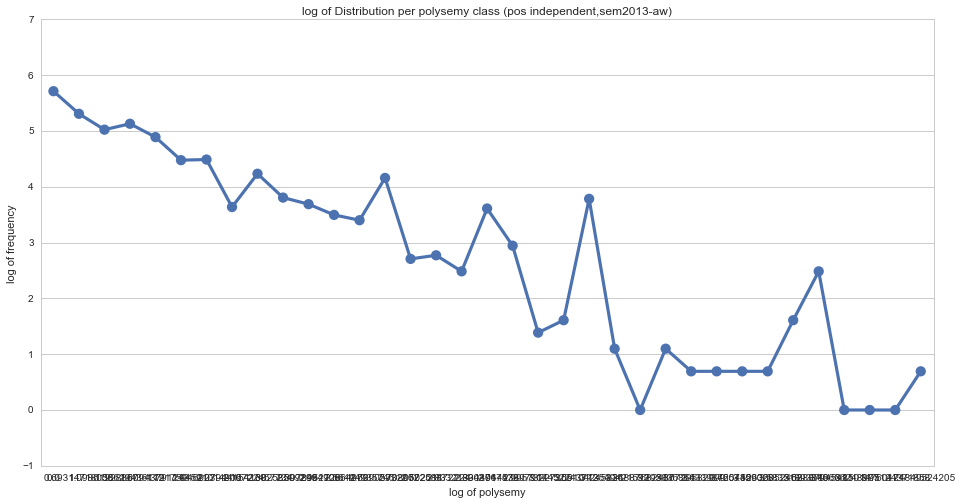

In [7]:
#if rel_freq is set to False, the absolute frequencies are plotted
#if pos_independent is set to False, polysemy is calculated for a specifc pos instead of all pos.
#log_it: if set to True, the log-log plot is shown. (advised to set rel_freq to False when used)
my_wsd_analyzer.plot('polysemy', rel_freq=False, pos_independent=True, log_it=True)

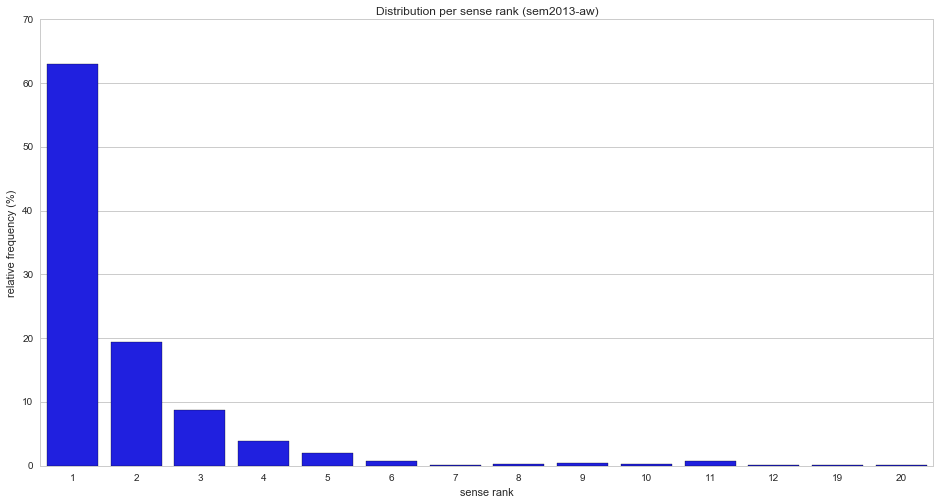

In [8]:
#if rel_freq is set to False, the absolute frequencies are plotted
#rel_freq: if set to True, relative frequency is plotted
#log_it: if set to True, the log-log plot is shown. (advised to set rel_freq to False when used)
my_wsd_analyzer.plot('sense_rank', rel_freq=True, log_it=False)

## Comparing competitions

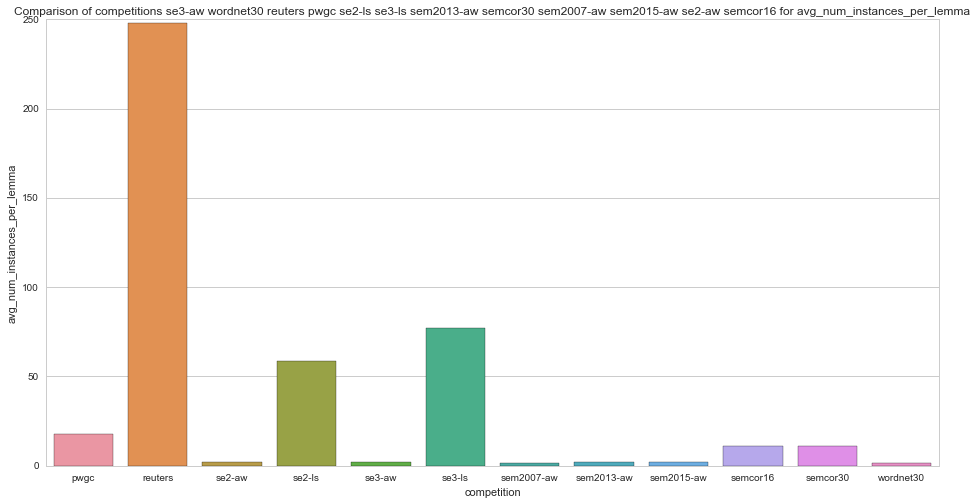

In [9]:
# options include: 
# 'num_instances'
# 'num_of_different_lemmas'
# 'mfs_baseline'
# 'avg_num_instances_per_lemma'
# 'avg_pol_all'
# 'avg_pol'
comparison.compare_basic_stats(competitions, 'avg_num_instances_per_lemma', exclude_mfs=False)

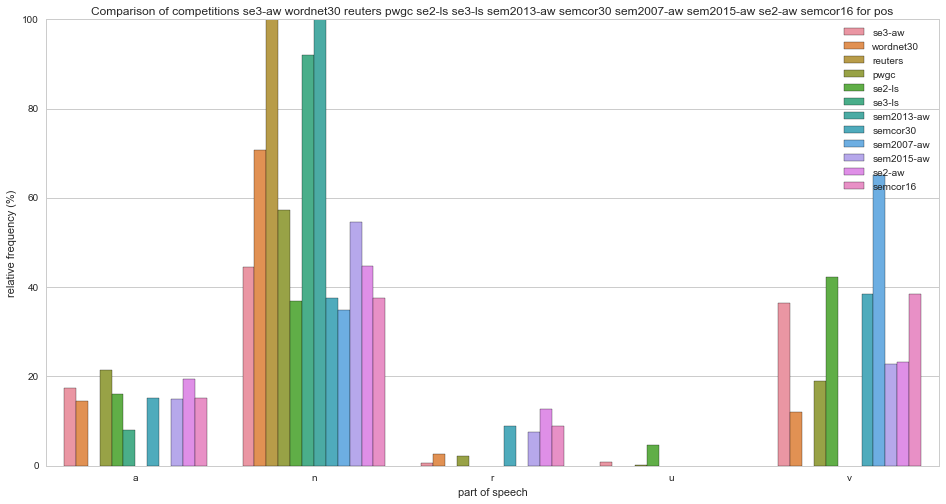

In [10]:
#options include:
# pos
# polysemy
# sense_rank
comparison.compare_properties(competitions,
                              'pos',
                              exclude_mfs=False,
                              rel_freq=True)